In [211]:
import os
from getpass import getpass

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY") or getpass(
    "Enter OpenAI API Key: "
)

In [212]:
from semantic_router.llms import OpenAILLM

llm = OpenAILLM(name="gpt-4o-2024-08-06")

In [213]:
import random
from graphai import router, node

@node(start=True)
async def node_a(param_a: str):
    """Descriptive string for the node.
    """
    print("node_a")
    return {"param_b": "Hello, World!"}

@node
async def node_b(param_b: str):
    """Descriptive string for the node.
    """
    print("node_b")
    new_str = param_b*2
    return {"param_c": new_str}

@router
async def node_router(param_c: str):
    # choose "node_c", "node_d" or "node_e" at random
    print("node_router")
    return {
        "param": "ab | ",
        "choice": random.choice(["node_c", "node_d", "node_e"])
    }

@node
async def node_c(param: str):
    print("node_c")
    return {"param": param+"c"}

@node
async def node_d(param: str):
    print("node_d")
    return {"param": param+"d"}

@node
async def node_e(param: str):
    print("node_e")
    return {"param": param+"e"}

@node(end=True)
async def node_end(param: str):
    """Descriptive string for the node.
    """
    print("node_end")
    new_str = param*2
    return {"output": new_str}

In [214]:
from graphai import Graph

graph = Graph()

In [215]:
for node_fn in [node_a, node_b, node_c, node_d, node_e, node_end]:
    graph.add_node(node_fn)

# add the router
graph.add_router(
    sources=[node_b],
    router=node_router,
    destinations=[node_c, node_d, node_e]
)

# build the certain edges
graph.add_edge(source=node_a, destination=node_b)
# TODO it is kind of weird that I dn't explicitly define node_b to node_router edge
graph.add_edge(source=node_c, destination=node_end)
graph.add_edge(source=node_d, destination=node_end)
graph.add_edge(source=node_e, destination=node_end)

In [216]:
graph.start_node, graph.end_nodes

(graphai.nodes.base._Node._node.<locals>.NodeClass,
 [graphai.nodes.base._Node._node.<locals>.NodeClass])

2024-12-09 14:28:27 - semantic_router.utils.logger - INFO - graph.py:148 - visualize() - The graph is acyclic. Visualization will use a topological layout.


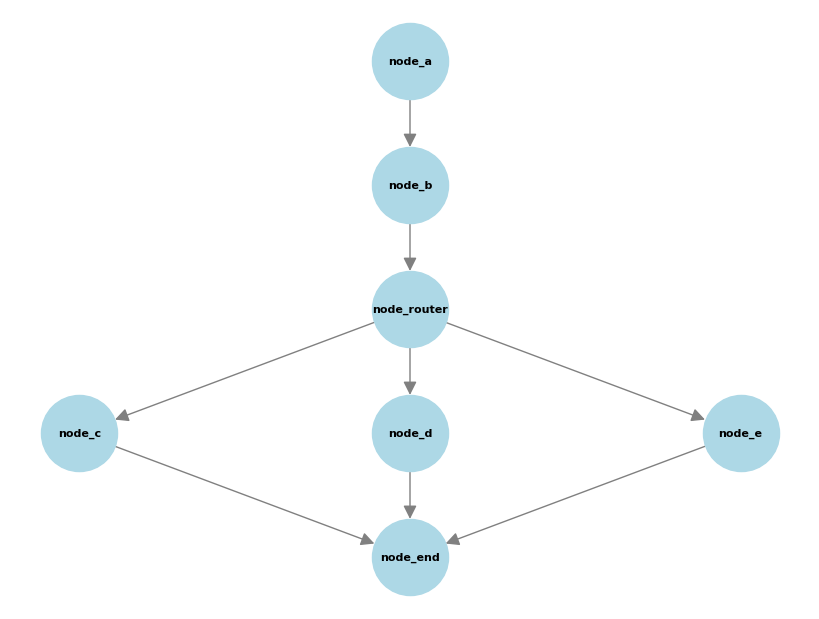

In [220]:
graph.visualize()

In [217]:
await graph.execute(input={"param_a": "l"})

node_a
node_b
node_router
node_d


{'param_a': 'l',
 'param_b': 'Hello, World!',
 'param_c': 'Hello, World!Hello, World!',
 'param': 'ab | d'}

In [218]:
node_a.get_signature()

"param_a: <class 'str'>"

In [219]:
node_a.invoke(input={"param_a": "l"})

<coroutine object _Node._node.<locals>.NodeClass.invoke at 0x000002159EB0EC40>